## EasyOCR
- CRAFT 모델 기반
- return bounding box, text and confident level
- pip install easyocr
- GPU 있으면 자동으로 GPU mode 작동

### 참고링크
- https://pypi.org/project/easyocr/

![easyocr_framework](img/easyocr_framework.jpeg)

## 기본 예시

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[20, 12], [472, 12], [472, 40], [20, 40]],
  '쟁점 3J 인공 지능을 활용한 면접에서의 평가는 객관적인가?',
  0.3595733940601349),
 ([[28, 50], [510, 50], [510, 76], [28, 76]],
  '찬성1:면접관의 주에 영향을 받지않고 일관된 평가기준을',
  0.17118030786514282),
 ([[94, 78], [424, 78], [424, 106], [94, 106]],
  '적용할 수있어 객관적임을 밝히고 있다',
  0.0952383428812027),
 ([[27, 109], [510, 109], [510, 140], [27, 140]],
  '반대1:빅데이터에 근거하지 않고 왜곡된 징보를 바탕으로',
  0.5887412428855896),
 ([[96, 140], [469, 140], [469, 173], [96, 173]],
  '평가하므로 객관적이지 않음을 강조하고 있다.',
  0.7437706589698792)]

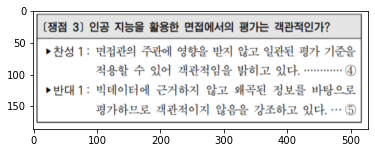

In [33]:
from matplotlib.pyplot import imshow
from PIL import Image

f_name = 'ocr-image/test1.PNG'

%matplotlib inline
pil_im = Image.open(f_name, 'r')
imshow(pil_im)

import easyocr

# easy-ocr
reader = easyocr.Reader(['ko','en'])
txt = reader.readtext(f_name)
txt

## 수능 국어 문제 crop OCR

In [31]:
# PNG img to OCR txt
## GPU 있을시 자동으로 GPU 동작

import easyocr

reader = easyocr.Reader(['ko','en'])
ocr_txt = reader.readtext('ocr-image/2020-kor-1_crop.png')

# bounding box, text, confident level.
for b_box, text, cf_level in ocr_txt:
    print(b_box, text, cf_level)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[[119, 5], [807, 5], [807, 49], [119, 49]] 활용한 면접을 신뢰한디는 비율이 높게 나왔습니다 0.1630537509918213
[[1058, 26], [1896, 26], [1896, 74], [1058, 74]] 가의 입론을 쟁점별로 정리한 내용으로 적절하지 않은 것은? 0.07356252521276474
[[1012, 32], [1042, 32], [1042, 64], [1012, 64]] 4. 0.6801971793174744
[[63, 55], [905, 55], [905, 99], [63, 99]] 사호자:이번에는 반대 측에서 입론해 주신후찬성측에서 반대 0.13634346425533295
[[119, 107], [347, 107], [347, 149], [119, 149]] 신문해 주십시오. 0.5568816661834717
[[1055, 123], [1127, 123], [1127, 163], [1055, 163]] [쟁점 0.92715984582901
[[1137, 123], [1649, 123], [1649, 163], [1137, 163]] 1인공 지능을 활용한 면접은 편리한가? 0.3160681426525116
[[64, 154], [908, 154], [908, 203], [64, 203]] 반대1:저희는 인공 지능을 면접어 활용히는 것이 바람직하다고 0.34513208270072937
[[1501, 185], [1885, 185], [1885, 229], [1501, 229]] 않고 면접에 참여할 수있는 0.19117774069309235
[[1085, 187], [1491, 187], [1491, 231], [1085, 231]] 찬성1:띠와 장소에 얽마이지 0.2588751018047333
[[122, 210], [904, 210], [904, 261], [122, 261]] 보지않습니다먼저 인공지능을활용한 면접은기술적 결함이 0.4078507125377655
[[1193, 237], [1711, 23

## OpenCV  Visualization

In [39]:
import cv2

# 한페이지 전체 다하면 오래걸려서 crop 이미지 사용
cv_img = cv2.imread('ocr-image/2020-kor-1_crop.png')
x, y, c = cv_img.shape

original_img =  cv2.resize(original_img, (int(y/2), int(x/2))).copy()

# show original image
cv2.imshow('original', cv2.resize(original_img, (int(y/2), int(x/2))))
cv2.waitKey(0)

# draw bounding box by cv2.rectangle
for b_box, text, cf_level in ocr_txt:
    cv_img = cv2.rectangle(cv_img, tuple(b_box[0]), tuple(b_box[2]), color=(0,0,255))
    
cv_img = cv2.resize(cv_img, (int(y/2),int(x/2)))
cv2.imshow('easyocr-img', cv_img)
cv2.waitKey(0)

-1

In [30]:
cv2.imwrite('ocr-image/2020-kor-1_crop_result.png', cv_img)

True

## MatPlotlib Visualization

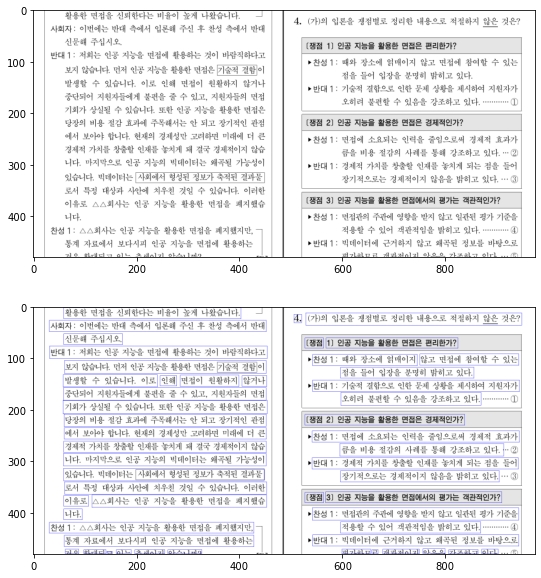

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plt.subplot(211)
plt.imshow(original_img)

plt.subplot(212)
plt.imshow(cv_img)
plt.show()
